In [1]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the image
img = cv2.imread("Assets/lane_detection.png")

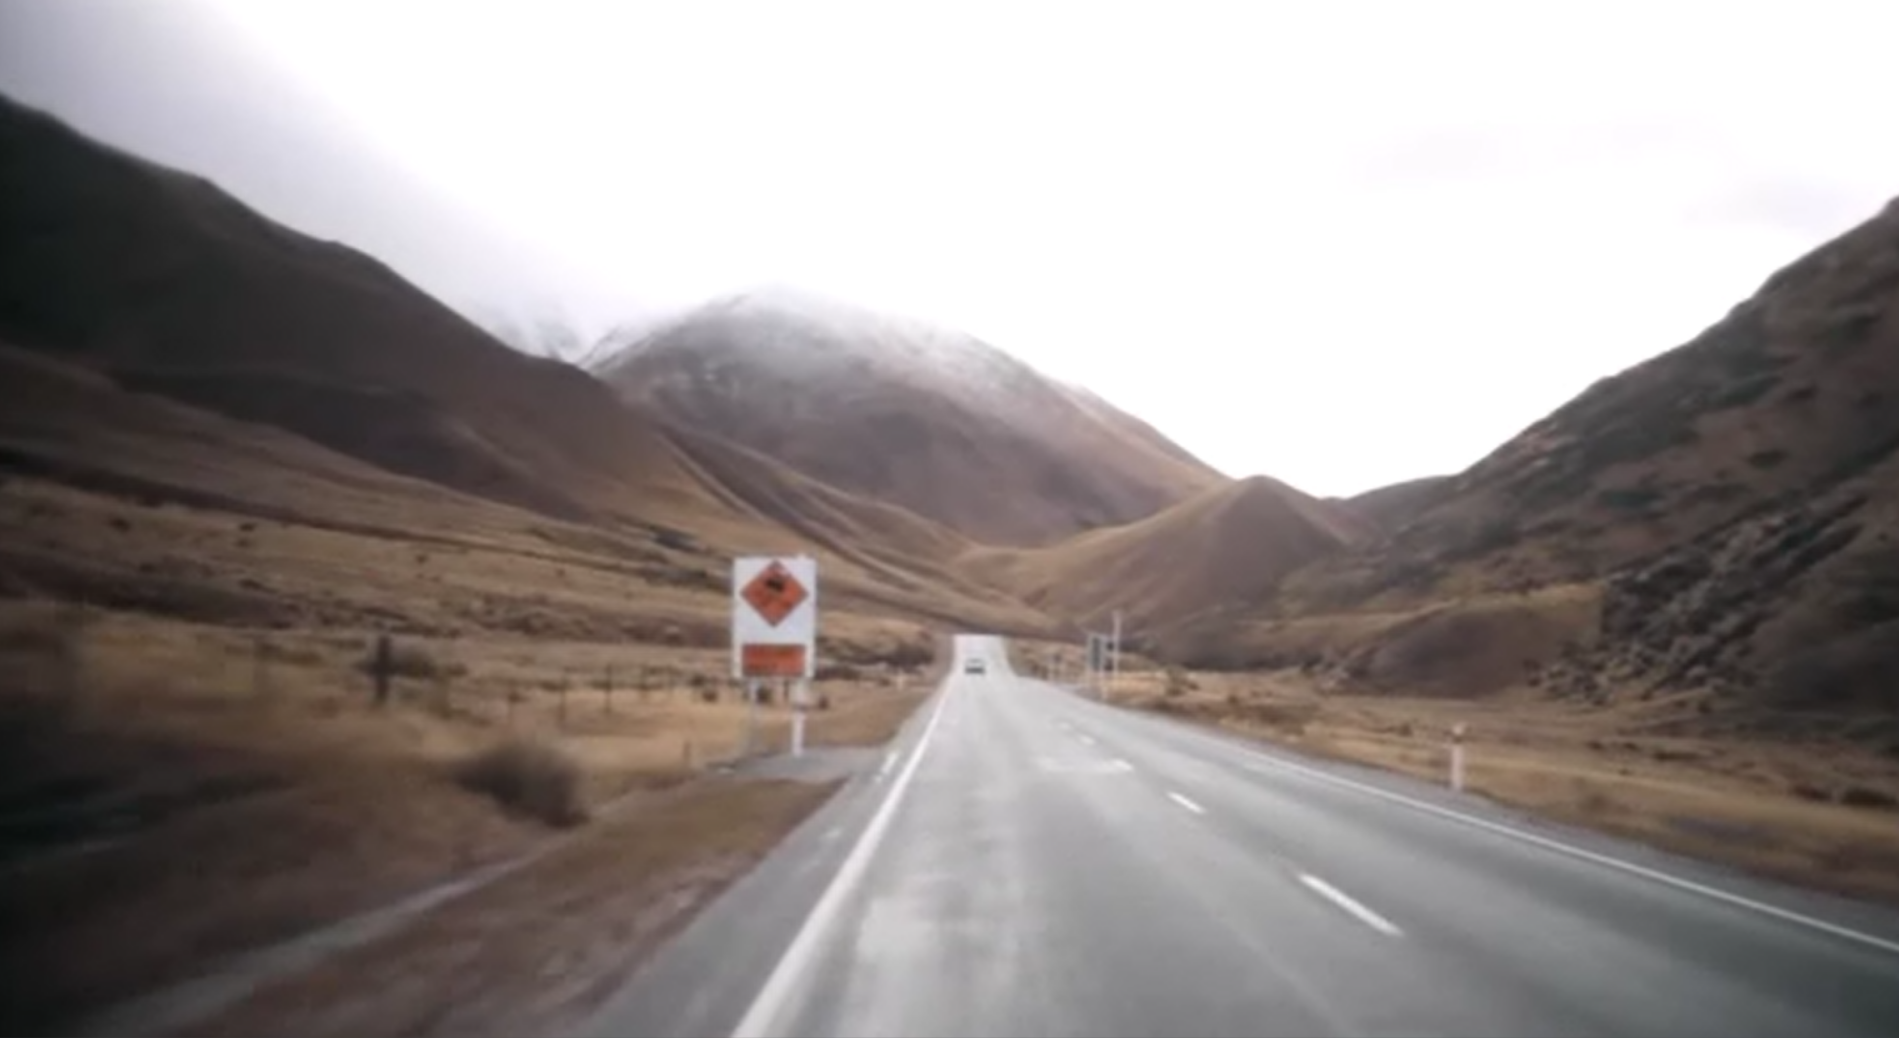

In [3]:
#taking copy of original image so that changes doesn't effect original image
road_image = np.copy(img)
#making a gray image 
gray = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)

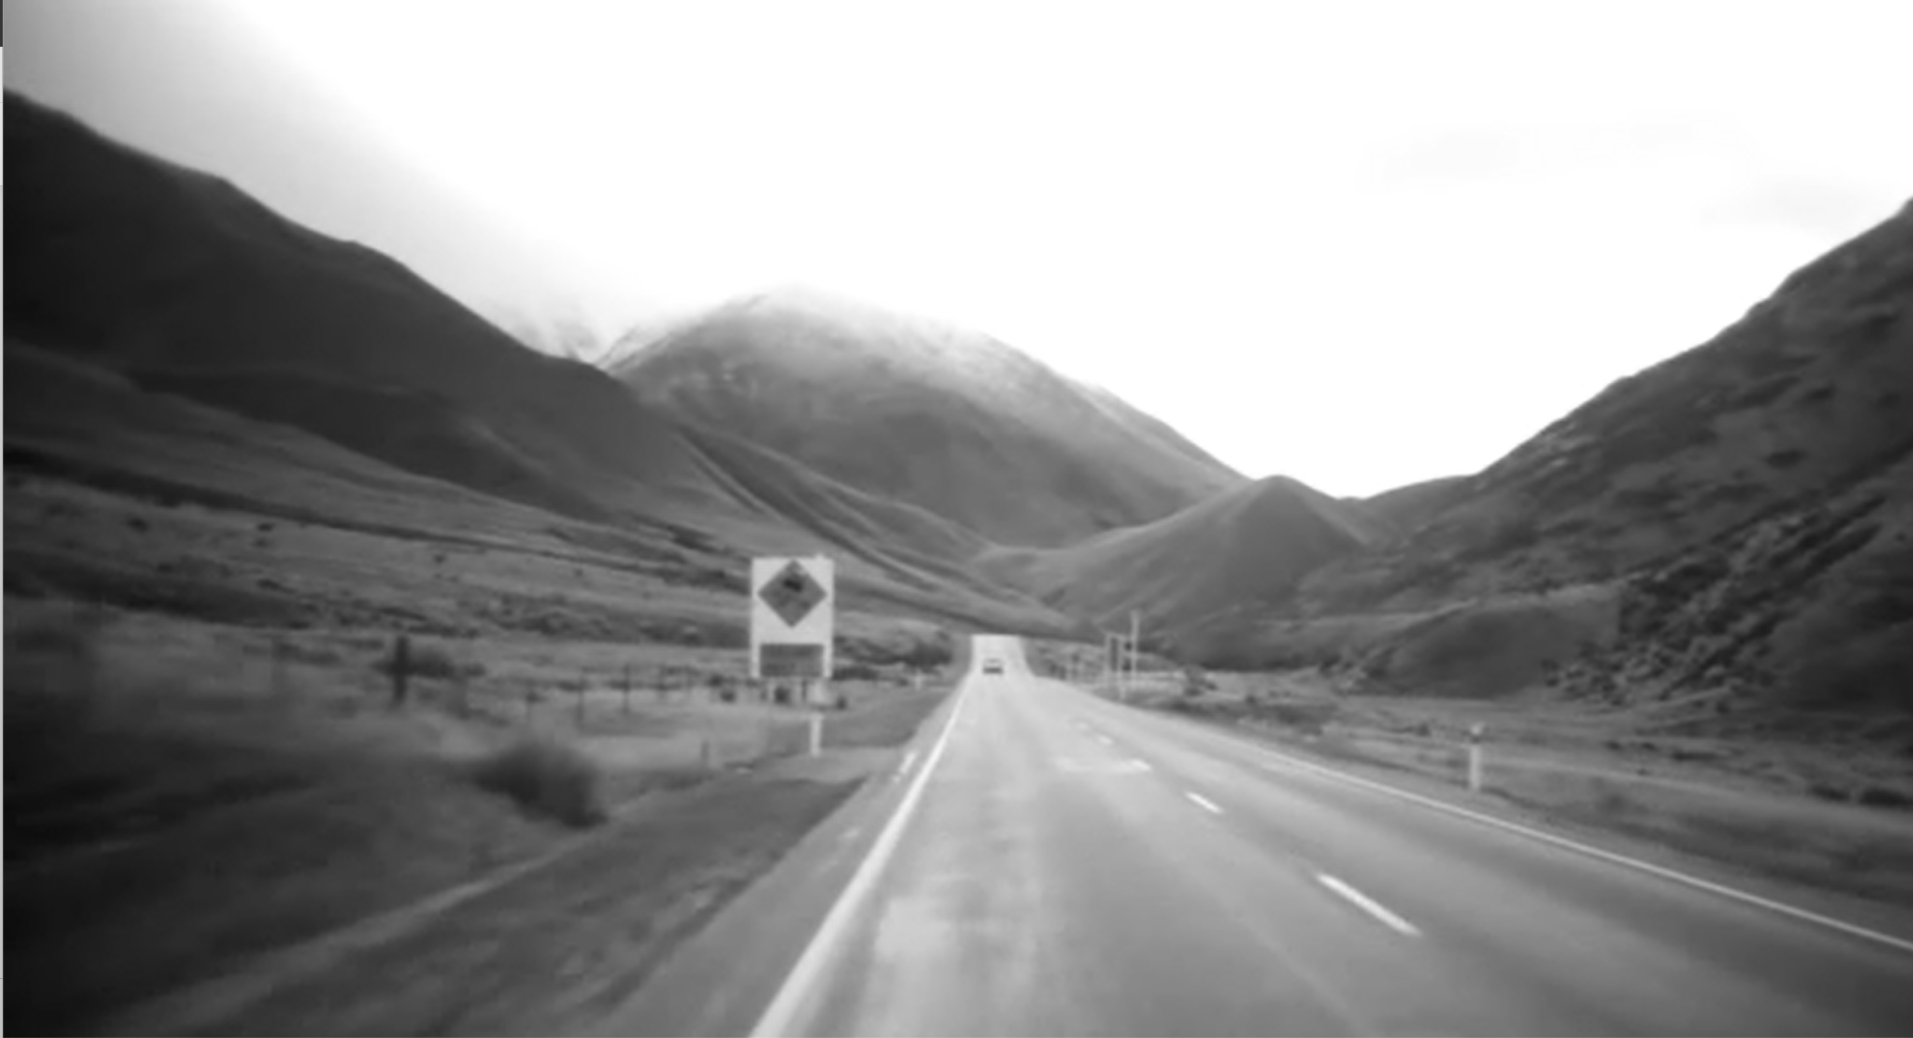

In [4]:
#detecting edges with Canny edge Detection algorithm
canny = cv2.Canny(gray, 50, 150) 

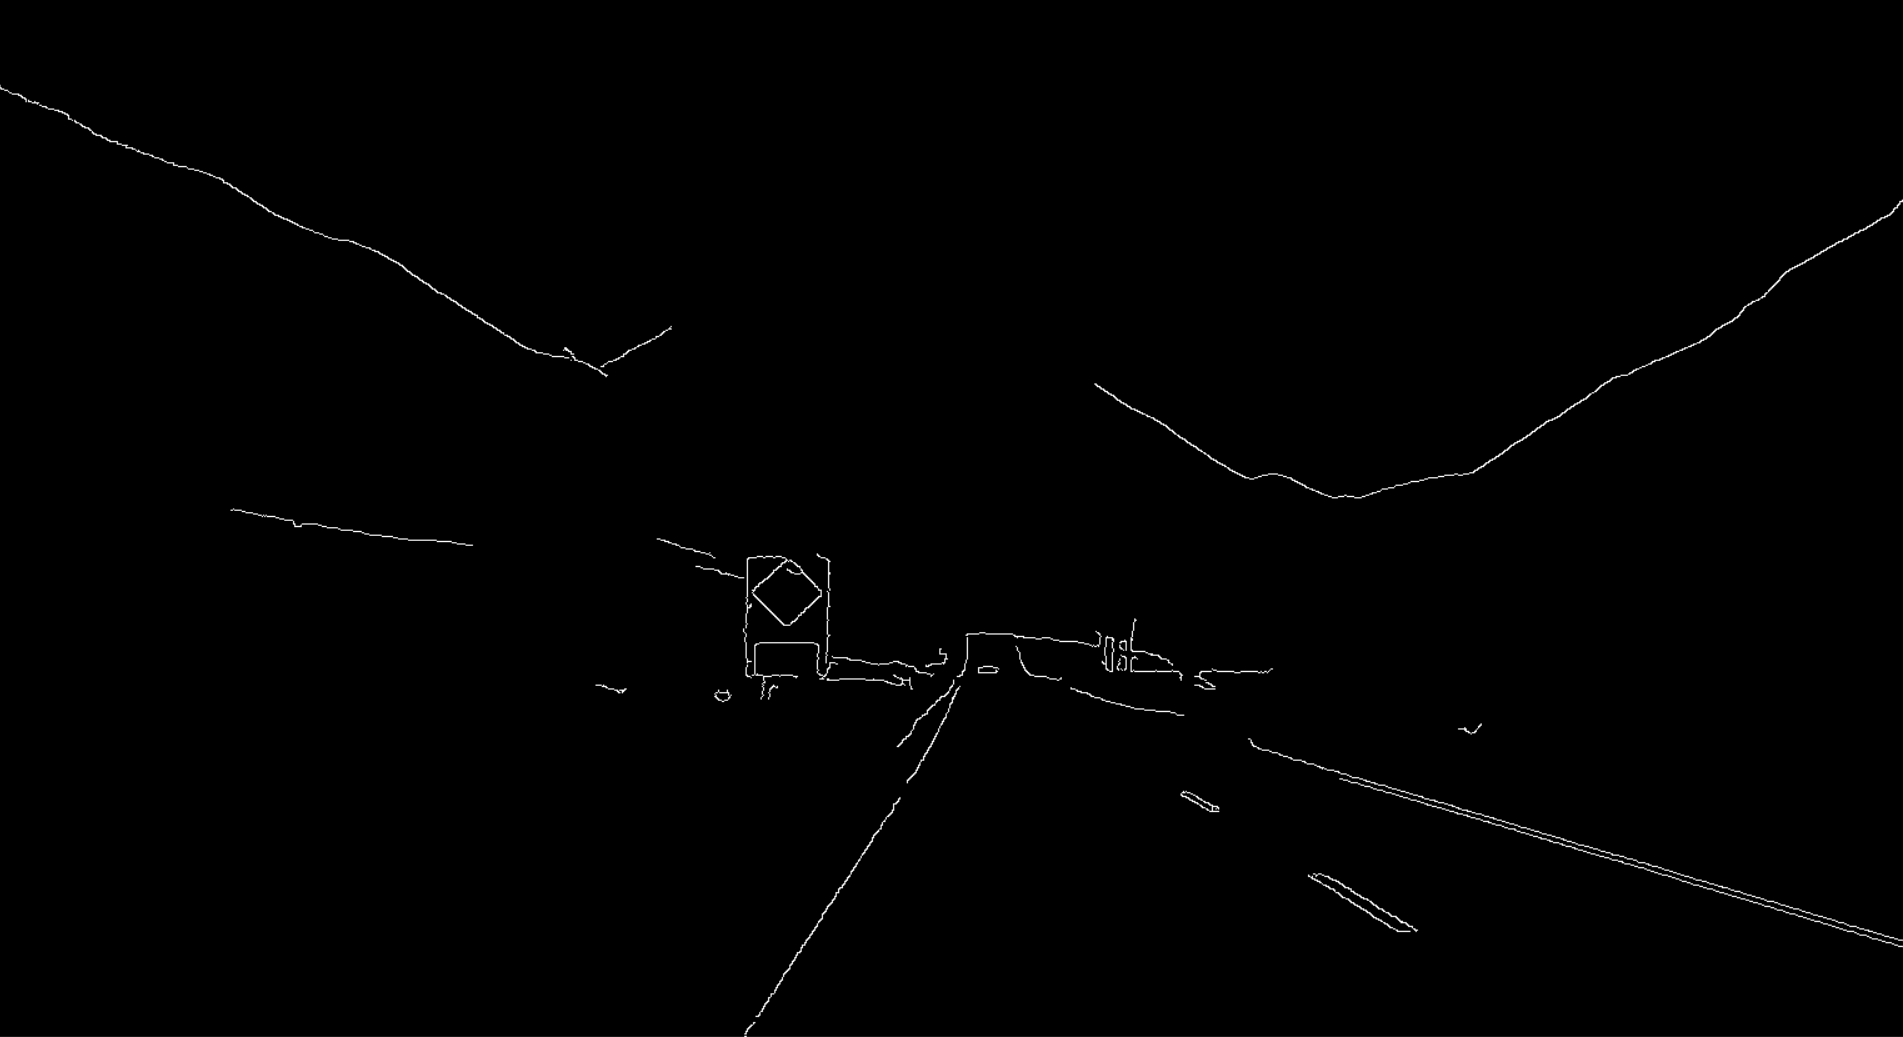

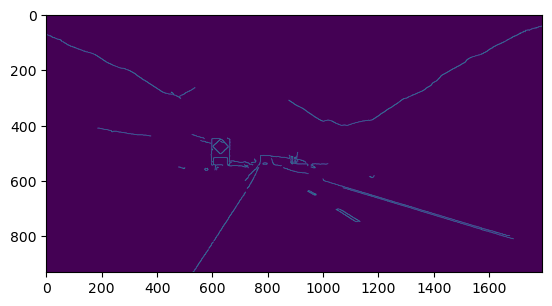

In [5]:
#plotting with matplotlib to decide ROI to focus on lower part of the image
plt.imshow(canny)
plt.show()

In [6]:
height = canny.shape[0]
width = canny.shape[1]
polygons = np.array([
    [(500, height), (width, height), (800, 500)]
    ])
mask = np.zeros_like(canny)
cv2.fillPoly(mask, polygons, (255,255,255))

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0]], dtype=uint8)

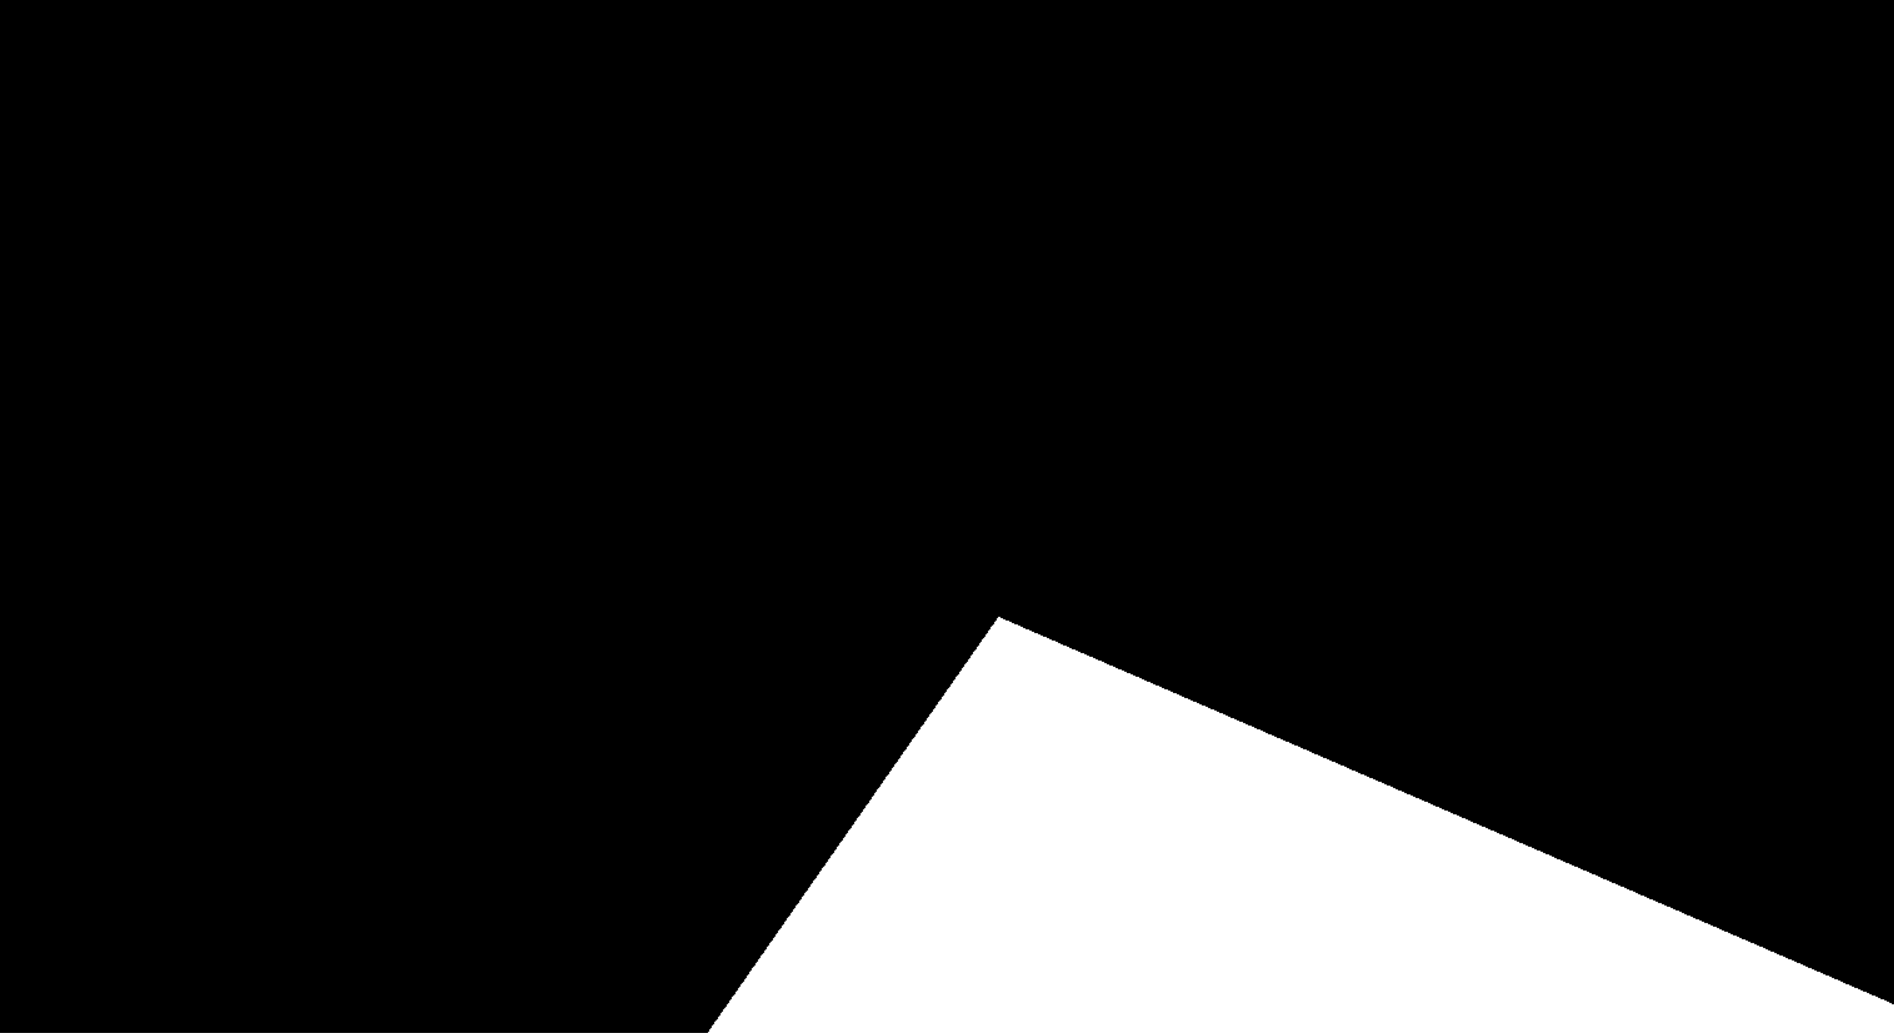

In [7]:
masked_img = cv2.bitwise_and(canny, mask)

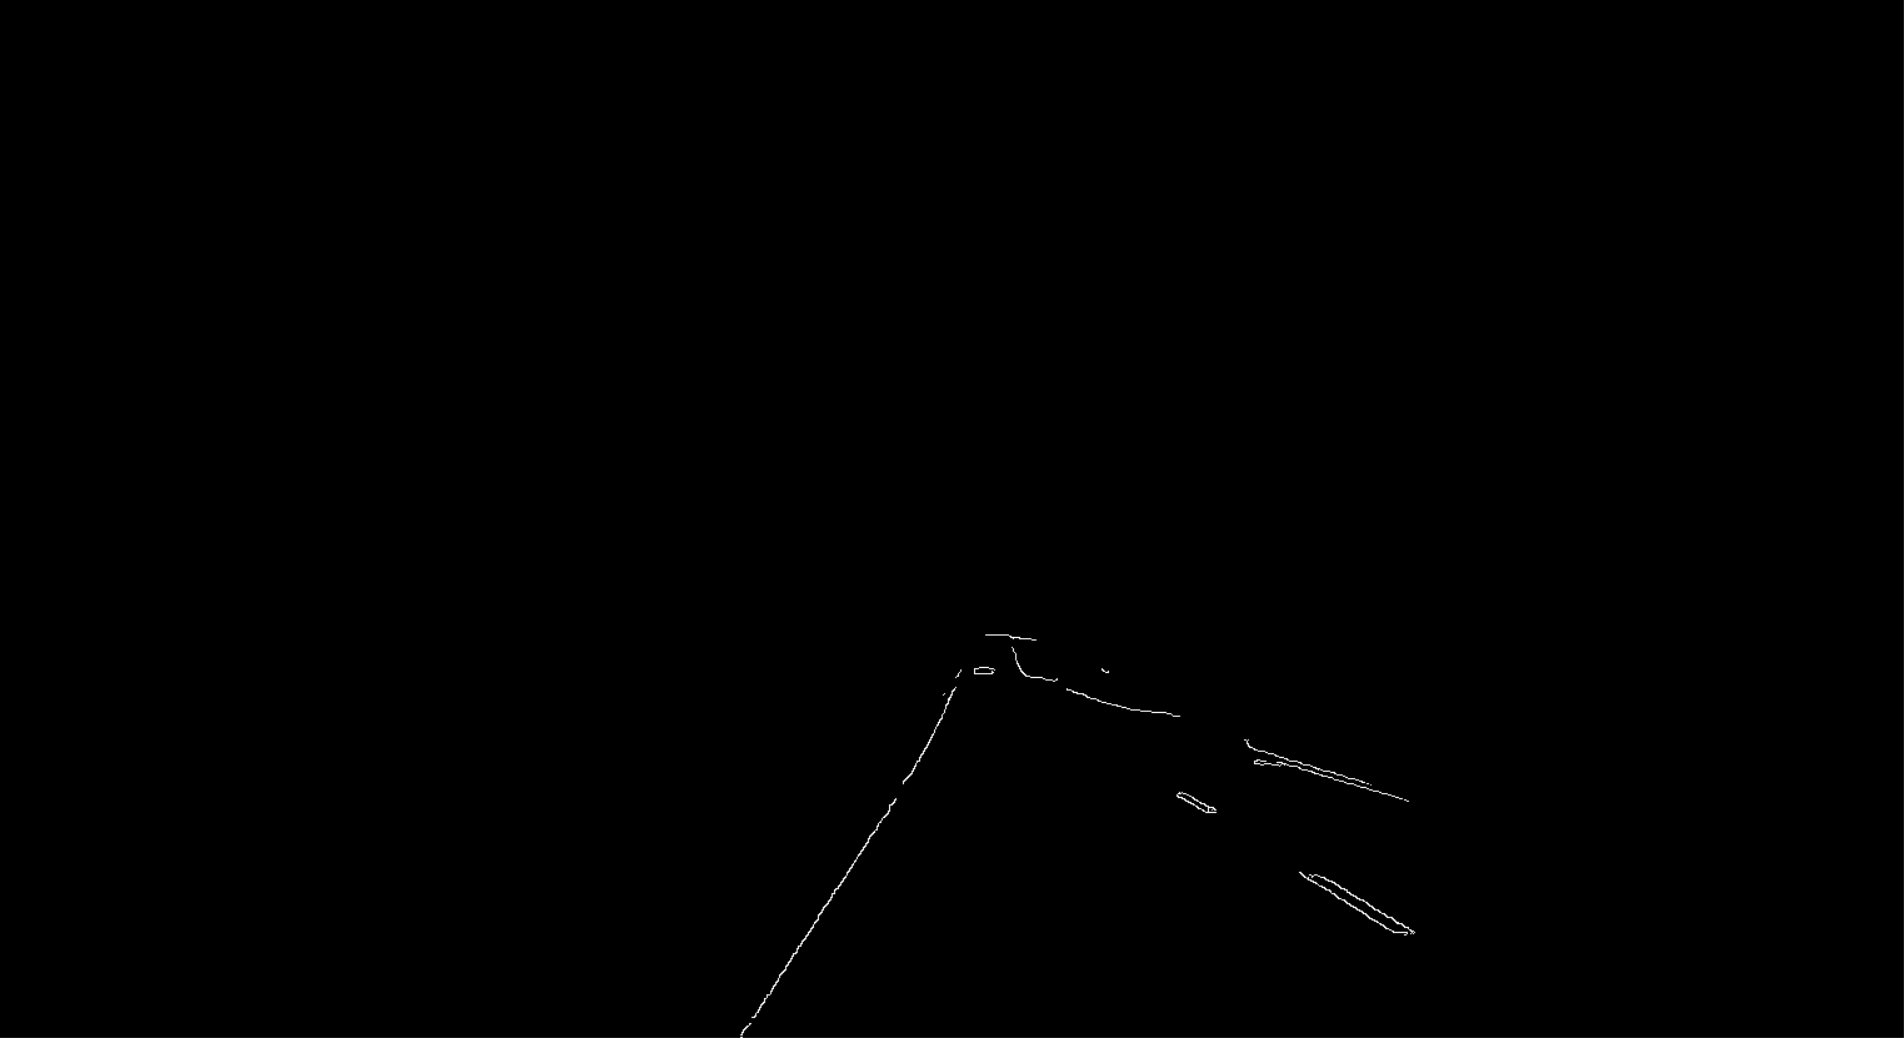

In [15]:
#hough-transform

#storing slope and y-intercept of all lines genereated from hough transform algo to right and left list
def average(image, lines):
    left = []
    right = []
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
            
#averaging slope and y-intercept to optimize all the random generated lines             
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])

#finding x and y co-ordinates from averaged slope and y-intercept
def make_points(image, average): 
    slope, y_int = average 
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])

#displaying lines on image 
def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 10)
    return lines_image

lines = cv2.HoughLinesP(masked_img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average(road_image, lines)
black_lines = display_lines(road_image, averaged_lines)
lanes = cv2.addWeighted(road_image, 0.8, black_lines, 1, 1)
cv2.imshow("lanes", lanes)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[535 927 602 823]]
[[607 816 710 657]]
[[1051  704 1120  748]]
[[1064  704 1119  737]]
[[1003  599 1099  629]]
[[602 824 721 641]]
[[1063  704 1135  747]]


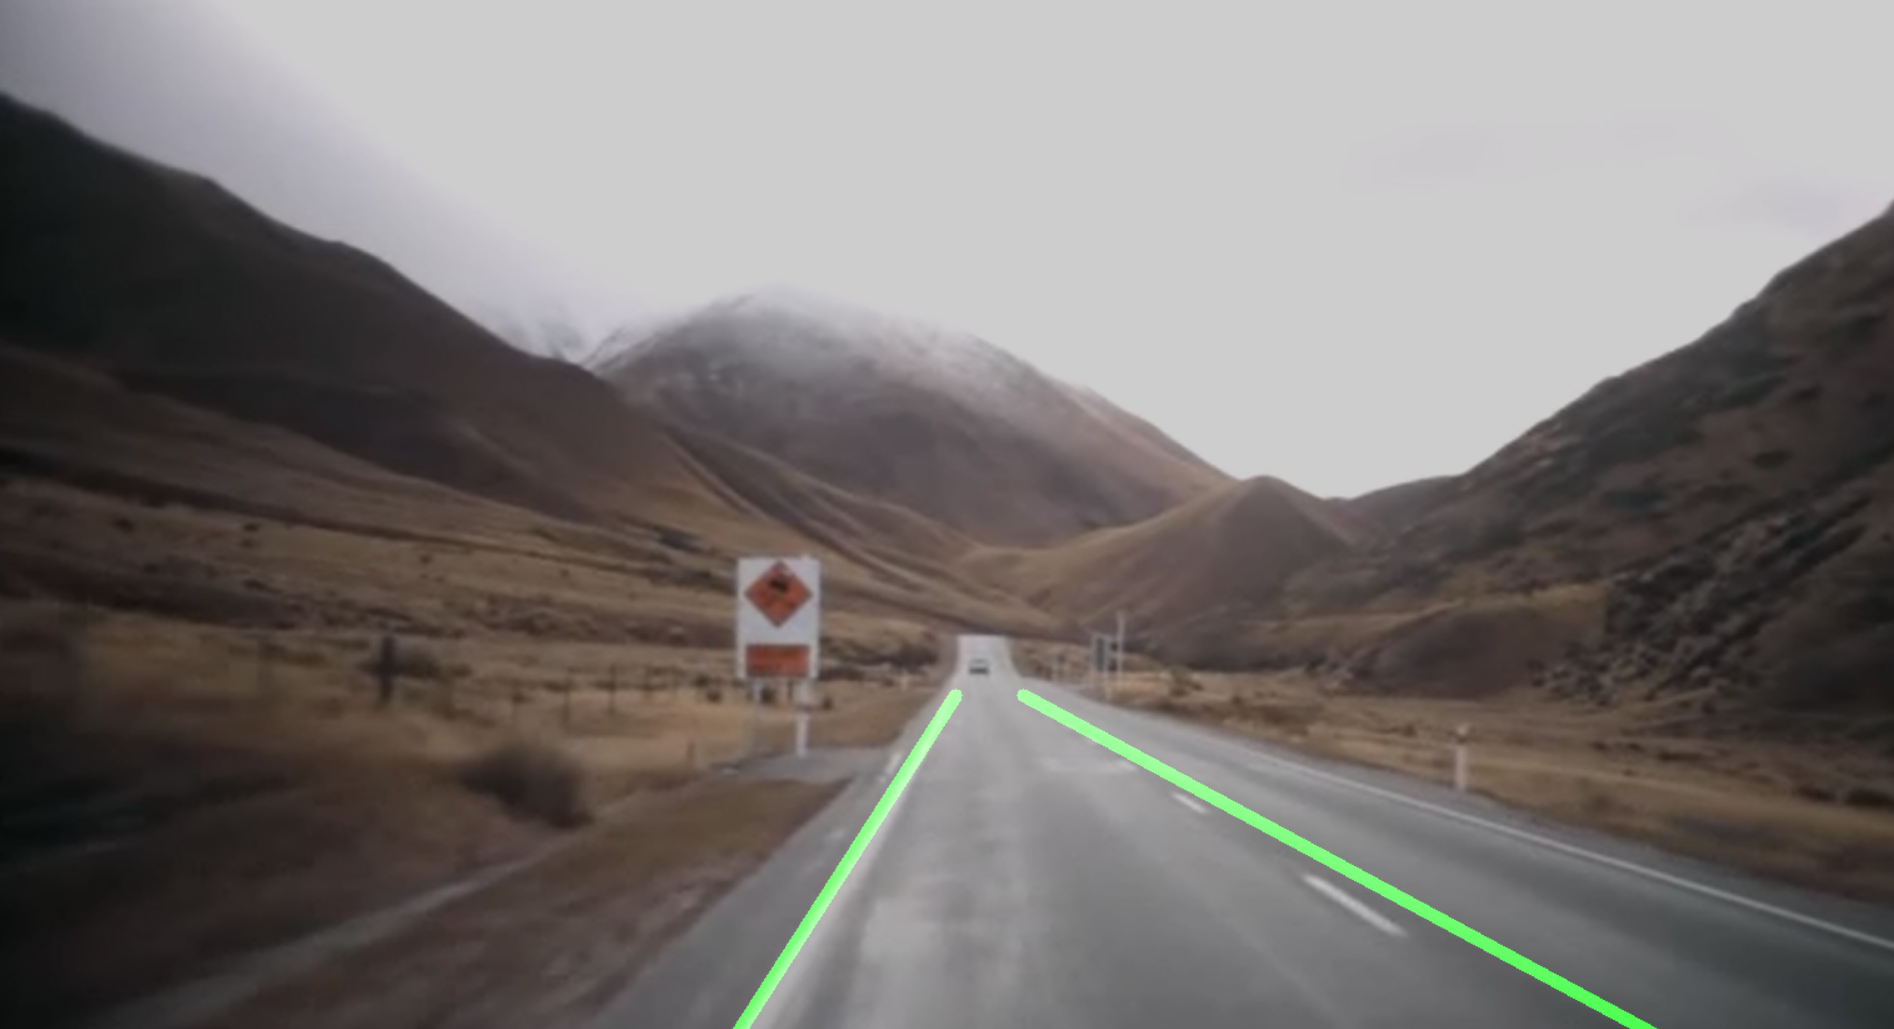